In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import os

In [10]:
path = os.getcwd()

In [16]:
# comparing random.randn method and multivar method, try just for one individual. 

path_betas = "GIMME analyses/Cleaned GIMME Data/Control_Group_output/individual/10"
path_data = "GIMME analyses/Cleaned GIMME Data/Control_Group/10"
data = np.loadtxt(path_betas+'01Betas.csv', skiprows=1, usecols=range(1,9), delimiter=',')
contemp_beta = data[:,4:]
lagged_beta = data[:,:4]
VR, SS, ANX, INT = np.genfromtxt(path_data+'01.txt', skip_header=1, unpack=True)
std_vr, std_ss, std_anx, std_int = np.nanstd(VR), np.nanstd(SS), np.nanstd(ANX), np.nanstd(INT)
var_vr, var_ss, var_anx, var_int = np.nanvar(VR), np.nanvar(SS), np.nanvar(ANX), np.nanvar(INT)
mean_vr, mean_ss, mean_anx, mean_int = np.nanmean(VR), np.nanmean(SS), np.nanmean(ANX), np.nanmean(INT)

# np.random.randn method

In [38]:
alpha = 0.5

length = 75
M = np.zeros((length,4))
M[0,:] = np.array([mean_vr, mean_ss, mean_anx, mean_int]) + alpha*np.random.randn(4)*np.array([std_vr, std_ss, std_anx, std_int])

for r in range(1,length):   
    noise = alpha*np.random.randn(4)*np.array([std_vr, std_ss, std_anx, std_int])
    M[r] = np.matmul(np.matmul(np.linalg.inv(np.eye(4)-contemp_beta),lagged_beta),M[r-1])     
    M[r] += noise
M[:,:] += np.array([mean_vr, mean_ss, mean_anx, mean_int])

np.savetxt(path+'/ind_1_vector/ind_1_vector.txt', M, delimiter=',', header='VR,SS,ANX,INT', comments='')

# multivariate_normal method 

In [39]:
alpha = 0.5

length = 75
M = np.zeros((length,4))
covariance = alpha**2*np.diag([var_vr, var_ss, var_anx, var_int])
noise = np.random.multivariate_normal(np.zeros(4), covariance)
M[0,:] = np.array([mean_vr, mean_ss, mean_anx, mean_int]) + noise

for r in range(1,length):   
    noise = np.random.multivariate_normal(np.zeros(4), covariance)
    M[r] = np.matmul(np.matmul(np.linalg.inv(np.eye(4)-contemp_beta),lagged_beta),M[r-1])     
    M[r] += noise
M[:,:] += np.array([mean_vr, mean_ss, mean_anx, mean_int])

np.savetxt(path+'/ind_1_multivariate/ind_1_multivariate.txt', M, delimiter=',', header='VR,SS,ANX,INT', comments='')

# Plot

In [40]:
vr_multi, ss_multi, anx_multi, int_multi = np.loadtxt(path+'/ind_1_multivariate/ind_1_multivariate.txt', skiprows=1, delimiter=',', unpack=True)
vr_vec, ss_vec, anx_vec, int_vec = np.loadtxt(path+'/ind_1_vector/ind_1_vector.txt', skiprows=1, delimiter=',', unpack=True)

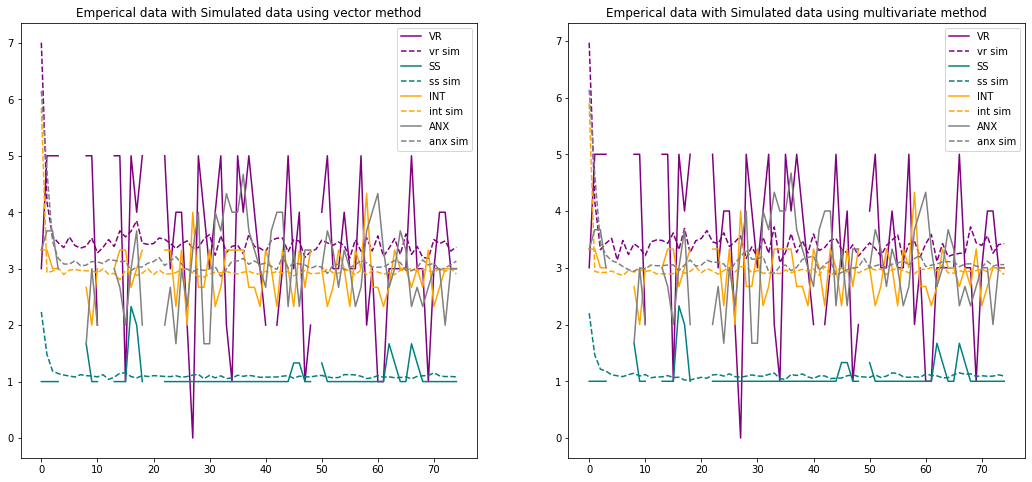

In [35]:
t = np.arange(0, length)

plt.figure(figsize=(18, 8))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(t, VR, label='VR', linestyle='-', color='purple')
ax1.plot(t, vr_vec, label='vr sim', linestyle='--', color='purple')
ax1.plot(t, SS, label='SS', linestyle='-', color='teal')
ax1.plot(t, ss_vec, label='ss sim', linestyle='--', color='teal')
ax1.plot(t, INT, label='INT', linestyle='-', color='orange')
ax1.plot(t, int_vec, label='int sim', linestyle='--', color='orange')
ax1.plot(t, ANX, label='ANX', linestyle='-', color='gray')
ax1.plot(t, anx_vec, label='anx sim', linestyle='--', color='gray')
ax1.set_title('Emperical data with Simulated data using vector method')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(t, VR, label='VR', linestyle='-', color='purple')
ax2.plot(t, vr_multi, label='vr sim', linestyle='--', color='purple')
ax2.plot(t, SS, label='SS', linestyle='-', color='teal')
ax2.plot(t, ss_multi, label='ss sim', linestyle='--', color='teal')
ax2.plot(t, INT, label='INT', linestyle='-', color='orange')
ax2.plot(t, int_multi, label='int sim', linestyle='--', color='orange')
ax2.plot(t, ANX, label='ANX', linestyle='-', color='gray')
ax2.plot(t, anx_multi, label='anx sim', linestyle='--', color='gray')
ax2.set_title('Emperical data with Simulated data using multivariate method')
ax2.legend()

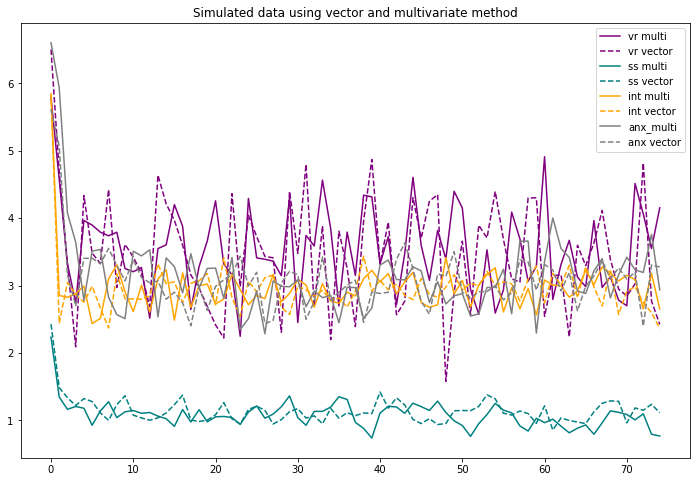

In [41]:
plt.figure(figsize=(12, 8))

plt.plot(t, vr_multi, label='vr multi', linestyle='-', color='purple')
plt.plot(t, vr_vec, label='vr vector', linestyle='--', color='purple')

plt.plot(t, ss_multi, label='ss multi', linestyle='-', color='teal')
plt.plot(t, ss_vec, label='ss vector', linestyle='--', color='teal')

plt.plot(t, int_multi, label='int multi', linestyle='-', color='orange')
plt.plot(t, int_vec, label='int vector', linestyle='--', color='orange')

plt.plot(t, anx_multi, label='anx_multi', linestyle='-', color='gray')
plt.plot(t, anx_vec, label='anx vector', linestyle='--', color='gray')

plt.title('Simulated data using vector and multivariate method')
plt.legend()